In [19]:
import pandas as pd
from datetime import datetime,date
import numpy as np

#dataset with no changes
data = pd.read_csv('used-cars-database\data_test.csv',sep=',',engine='c',low_memory=False,parse_dates = True)
data.head(10)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen;;;;;;;;
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000.0,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0.0,70435,2016-04-07 03:16:57;;;;;;;;
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000.0,5,diesel,audi,ja,2016-03-24 00:00:00,0.0,66954,2016-04-07 01:46:50;;;;;;;;
2,"2016-03-14 12:52:21,Jeep_Grand_Cherokee_""Overl...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000.0,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0.0,91074,2016-03-17 17:40:17;;;;;;;;
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000.0,7,diesel,skoda,nein,2016-03-31 00:00:00,0.0,60437,2016-04-06 10:17:21;;;;;;;;
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manuell,102,3er,150000.0,10,benzin,bmw,ja,2016-04-04 00:00:00,0.0,33775,2016-04-06 19:17:07;;;;;;;;
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109,2_reihe,150000.0,8,benzin,peugeot,nein,2016-04-01 00:00:00,0.0,67112,2016-04-05 18:18:39;;;;;;;;
7,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,privat,Angebot,0,test,limousine,1980,manuell,50,andere,40000.0,7,benzin,volkswagen,nein,2016-03-21 00:00:00,0.0,19348,2016-03-25 16:47:58;;;;;;;;
8,2016-04-04 23:42:13,Ford_C___Max_Titanium_1_0_L_EcoBoost,privat,Angebot,14500,control,bus,2014,manuell,125,c_max,30000.0,8,benzin,ford,NaN,2016-04-04 00:00:00,0.0,94505,2016-04-04 23:42:13;;;;;;;;
9,2016-03-17 10:53:50,VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...,privat,Angebot,999,test,kleinwagen,1998,manuell,101,golf,150000.0,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,0.0,27472,2016-03-31 17:17:06;;;;;;;;


In [20]:
#removing misspelled words
data = data.rename(columns={'lastSeen;;;;;;;;':'lastSeen'})
data = data[data['dateCrawled'].apply(len)==19]

#Correct date values
data['dateCrawled'] = data['dateCrawled'].map(lambda x: x[:10])
data['lastSeen'] = data['lastSeen'].map(lambda x: x[:10])
data['dateCreated'] = data['dateCreated'].map(lambda x: x[:10])

#Change data types
data['price'] = data['price'].astype('float')
data['powerPS'] = data['powerPS'].astype('float')
data['kilometer'] = data['kilometer'].astype('float')
data['monthOfRegistration'] = data['monthOfRegistration'].astype('int')
data['yearOfRegistration'] = data['yearOfRegistration'].astype('int')

#Create column of time of the advertising online
lastSeen_correct = data['lastSeen'].map(lambda x: date(int(x.split('-')[0]),int(x.split('-')[1]),int(x.split('-')[2])))
dateCreated_correct = data['dateCreated'].map(lambda x: date(int(x.split('-')[0]),int(x.split('-')[1]),int(x.split('-')[2])))
time_online = lastSeen_correct-dateCreated_correct
data['time_online'] = time_online.dt.days

#Remove unnecessary features
data = data.drop(['name','nrOfPictures','postalCode','dateCrawled','dateCreated','lastSeen'],axis=1)

#Remode duplicate rows and outliers
data = data.drop_duplicates(data.columns.values)
data = data[(data.yearOfRegistration <= 2019) 
      & (data.yearOfRegistration >= 1950) & (data.price >= 100) & (data.price <= 150000) & (data.powerPS >= 10) & (data.powerPS <= 500)]
data.head()

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,time_online
1,privat,Angebot,18300.0,test,coupe,2011,manuell,190.0,NaN,125000.0,5,diesel,audi,ja,14
3,privat,Angebot,1500.0,test,kleinwagen,2001,manuell,75.0,golf,150000.0,6,benzin,volkswagen,nein,0
4,privat,Angebot,3600.0,test,kleinwagen,2008,manuell,69.0,fabia,90000.0,7,diesel,skoda,nein,6
5,privat,Angebot,650.0,test,limousine,1995,manuell,102.0,3er,150000.0,10,benzin,bmw,ja,2
6,privat,Angebot,2200.0,test,cabrio,2004,manuell,109.0,2_reihe,150000.0,8,benzin,peugeot,nein,4


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

time_online = data['time_online']
price = data['price']
power = data['powerPS']
kilometer = data['kilometer']

#Create an image with histograms of price, time online, power and mileage 
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2)
fig.suptitle('Frequency',fontsize = 16)
ax1.hist(time_online,bins=200)
ax1.set_xlim([-10,50])
ax2.hist(price,bins=20)
ax3.hist(power,bins=20)
ax4.hist(kilometer)

ax1.set_xlabel('Time Online')
ax2.set_xlabel('Price')
ax3.set_xlabel('Power')
ax4.set_xlabel('Kilometer')

fig.set_size_inches(12,8)
plt.show()
fig.savefig('histograms.jpg')

<Figure size 1200x800 with 4 Axes>

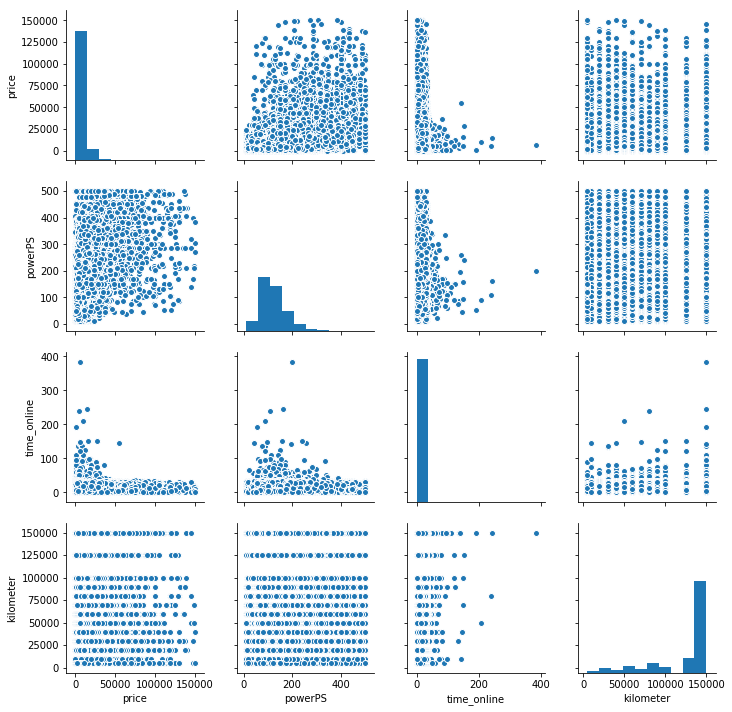

In [4]:
#Charts created in order to understand the relationships between features
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
non_numerical = ["name","monthOfRegistration","vehicleType","gearbox","fuelType","brand","notRepairedDamage","dateCrawled", "abtest", "dateCreated", "nrOfPictures", "lastSeen", "postalCode", "seller", "offerType", "model"]
numerical = ['price','powerPS','time_online','kilometer']
plot = sns.pairplot(data[numerical])
plot.savefig('seaborn.jpg')
plt.show()

In [22]:
#applying log transformation to minimize skewness from the features with higher skewness
skewed = ['price', 'yearOfRegistration','kilometer']
data_log_transformed = pd.DataFrame(data = data)
data_log_transformed[skewed] = data_log_transformed[skewed].apply(lambda x: np.log(x + 1))

In [23]:
#normalizing numerical features
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
scaler = MinMaxScaler()

le = LabelEncoder()
categorical = ['seller','offerType','abtest','vehicleType','gearbox','model','fuelType','brand','notRepairedDamage']
numerical = ['price','powerPS','time_online','kilometer','yearOfRegistration','monthOfRegistration']
all_columns = ['seller','offerType','abtest','vehicleType','gearbox','model','fuelType','brand','notRepairedDamage','price','powerPS','time_online','kilometer','yearOfRegistration','monthOfRegistration']
data_log_minmax_transform = pd.DataFrame(data = data_log_transformed)

for category in categorical:
    data_log_minmax_transform[category] = data_log_minmax_transform[category].astype('str')
    data_log_minmax_transform[category] = le.fit_transform(data_log_minmax_transform[category])
    
data_log_minmax_transform[all_columns] = scaler.fit_transform(data_log_minmax_transform[all_columns])
data_log_minmax_transform.head()

C:\Users\lucas\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,time_online
1,1.0,0.0,0.711953,1.0,0.375,0.885823,0.5,0.367347,0.644,0.946392,0.416667,0.428571,0.025641,0.0,0.036458
3,1.0,0.0,0.369528,1.0,0.500,0.742463,0.5,0.132653,0.472,1.000000,0.500000,0.142857,0.974359,1.0,0.000000
4,1.0,0.0,0.489348,1.0,0.500,0.842890,0.5,0.120408,0.412,0.849803,0.583333,0.428571,0.794872,1.0,0.015625
5,1.0,0.0,0.255144,1.0,0.750,0.656102,0.5,0.187755,0.044,1.000000,0.833333,0.142857,0.051282,0.0,0.005208
6,1.0,0.0,0.421940,1.0,0.250,0.785546,0.5,0.202041,0.032,1.000000,0.666667,0.142857,0.641026,1.0,0.010417


In [24]:
#split price from other features
price = pd.DataFrame(data = data_log_minmax_transform['price'])
data_log_minmax_transform = data_log_minmax_transform.drop(['price'],axis=1)

In [25]:
from sklearn.model_selection  import train_test_split

# Split the 'features' and 'price' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_log_minmax_transform, 
                                                    price, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 249322 samples.
Testing set has 62331 samples.


C:\Users\lucas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\lucas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\lucas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 a

[0.26207564012623097, 0.5123226651410767, 0.5865422864208666]
[0.046877384185791016, 0.04687380790710449, 0.32504987716674805]


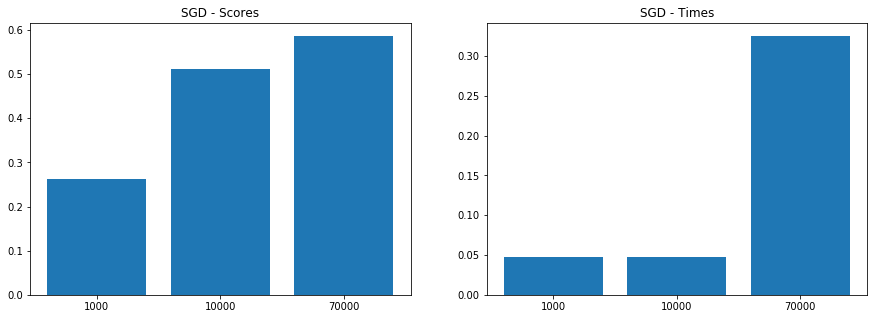

In [26]:
from time import time
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt

y_train = np.array(y_train).ravel()
y_test = np.array(y_test).ravel()

#Benchmark model
b_mark = SGDRegressor()

#Number of samples that will be used to fit model
num_samples = [1000,10000,70000]

#Function to fit and return score and time to execute process 
def get_model_results(model):
    model_results=[]
    for num in num_samples:
        init_time = time()
        model.fit(X_train[:num],y_train[:num])
        score = model.score(X_test,y_test)
        final_time = time()
        total_time = final_time-init_time
        model_results.append([score,total_time])
    return model_results
    
#Results of score and times obtained for each number of samples
results = get_model_results(b_mark)

fig = plt.figure(figsize=(15,5))
scores = []
times = []

for r in results:
    scores.append(r[0])
    times.append(r[1])
print(scores)
print(times)
    
#Create and add charts of scores and times to figure 
ax1 = fig.add_subplot(1,2,1)
ax1.bar([str(num_samples[0]),str(num_samples[1]),str(num_samples[2])],scores)
ax1.set_title('SGD - Scores')

ax2 = fig.add_subplot(1,2,2)
ax2.bar([str(num_samples[0]),str(num_samples[1]),str(num_samples[2])],times)
ax2.set_title('SGD - Times')
plt.show()

C:\Users\lucas\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\lucas\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\lucas\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\lucas\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

[[[0.6034190910733228, 2.0557663440704346], [0.671784224112355, 20.479033708572388], [0.7119495970560961, 289.4043004512787]], [[0.5816723650926475, 0.9227418899536133], [0.5921899391008874, 13.203130722045898], [0.5933649257178266, 373.29772210121155]], [[0.5485516952540195, 1.4191443920135498], [0.6524463594682527, 12.560776472091675], [0.6973687718382903, 174.8938603401184]], [[0.7440215052588182, 0.5078282356262207], [0.8074330808995699, 1.8272712230682373], [0.8344789712780897, 11.80787706375122]]]


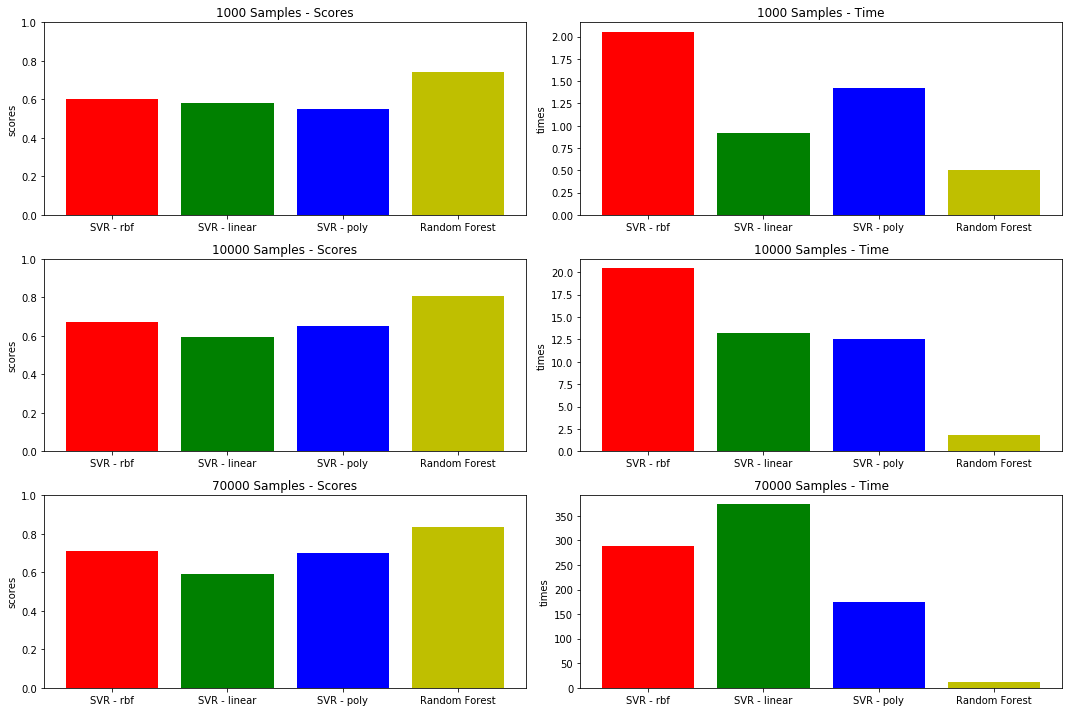

In [27]:
from time import time
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

y_train = np.array(y_train).ravel()
y_test = np.array(y_test).ravel()

#Create models to be evaluated
svr_rbf = SVR(kernel='rbf')
svr_lin = SVR(kernel='linear')
svr_poly = SVR(kernel='poly')
rf = RandomForestRegressor()

models = [svr_rbf,svr_lin,svr_poly,rf]
model_names = ['SVR - rbf','SVR - linear','SVR - poly','Random Forest']
num_samples = [1000,10000,70000]
results = []

fig=plt.figure(figsize=(15,10))

#Function to fit and return score and time to execute process 
def get_model_results(model):
    model_results=[]
    for num in num_samples:
        init_time = time()
        model.fit(X_train[:num],y_train[:num])
        score = model.score(X_test,y_test)
        final_time = time()
        total_time = final_time-init_time
        model_results.append([score,total_time])
    return model_results

results.append(get_model_results(svr_rbf))
results.append(get_model_results(svr_lin))
results.append(get_model_results(svr_poly))
results.append(get_model_results(rf))
print(results)

#Create charts to compare results of scores and times of each models
for i in range(3):
    scores = []
    times = []
    for j,r in enumerate(results):
        scores.append(r[i][0])
        times.append(r[i][1])
    
    ax1=fig.add_subplot(3, 2, 2*i+1)
    ax1.set_title(str(num_samples[i]) + " Samples - Scores")
        
    b1,b2,b3,b4 = ax1.bar([model_names[0],model_names[1],model_names[2],
                             model_names[3]],[scores[0],scores[1],scores[2],scores[3]])   
    b1.set_facecolor('r')
    b2.set_facecolor('g')
    b3.set_facecolor('b')
    b4.set_facecolor('y')
        
    ax1.set_ylim([0,1])
    ax1.set_ylabel('scores')
    
    ax2=fig.add_subplot(3, 2, 2*i+2)
    ax2.set_title(str(num_samples[i]) + " Samples - Time")
        
    b1,b2,b3,b4= ax2.bar([model_names[0],model_names[1],model_names[2],
                             model_names[3]],[times[0],times[1],times[2],times[3]])   
    b1.set_facecolor('r')
    b2.set_facecolor('g')
    b3.set_facecolor('b')
    b4.set_facecolor('y')
        
    ax2.set_ylabel('times')
    
plt.tight_layout()
plt.show()


In [28]:
#Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
# TODO: Initialize the classifier
clf = rf

#Create the parameters list you wish to tune, using a dictionary if needed.
parameters = {'n_estimators':[100,200],'criterion':['mse','mae'],'min_samples_leaf':[2,5],'min_samples_split':[2,4]}

#Make an r2_score scoring object using make_scorer()
scorer = make_scorer(r2_score)

#Perform grid search on the regressor using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring = scorer,n_jobs=-1)


#Fit the grid search object to the training data and find the optimal parameters using fit()
init_time = time()
grid_fit = grid_obj.fit(X_train[:3000],y_train[:3000])


#Get the estimator
best_clf = grid_fit.best_estimator_

score_final_rf = best_clf.score(X_test,y_test)
final_time = time()
total_time = final_time-init_time
print("Score: " + str(score_final_rf))
print("Time :" + str(total_time))

C:\Users\lucas\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Score: 0.793489189531841
Time :156.7359743118286


In [29]:
#Parameters of the best model
print(best_clf)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


In [35]:
from sklearn.model_selection import cross_val_score
#Test if for different parts of the data the model maintain the result
scores = cross_val_score(best_clf,X_test,y_test,cv=4,scoring = scorer)
print(scores)

[0.8451721  0.84419502 0.84383542 0.84874137]


In [15]:
#Score and time of benchmark and random forest regressor for full training set
init_time_best = time()
best_clf.fit(X_train,y_train)
final_time_best = time()
print("Random Forest Regressor - Score: " + str(best_clf.score(X_test,y_test)))
print("Random Forest Regressor - Time: " + str(final_time_best-init_time_best))

init_time_bm = time()
b_mark.fit(X_train,y_train)
final_time_bm = time()
print("Stochastic Gradient Descent - Score: " + str(b_mark.score(X_test,y_test)))
print("Stochastic Gradient Descent - Time: " + str(final_time_bm-init_time_bm))

Random Forest Regressor - Score: 0.865709644385806
Random Forest Regressor - Time: 329.810542345047


C:\Users\lucas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Stochastic Gradient Descent - Score: 0.5925698650011124
Stochastic Gradient Descent - Time: 0.9547498226165771


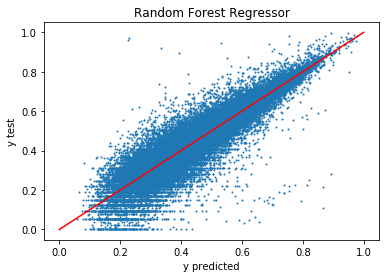

In [16]:
y = best_clf.predict(X_test)
#Create chart to visualize the performance of the random forest regressor model
fig, ax = plt.subplots(1,1)
plt.scatter(y,y_test,s=1)
ax.plot([0,1],c='r')
ax.set_xlabel('y predicted')
ax.set_ylabel('y test')
ax.set_title('Random Forest Regressor')
fig.savefig('pred_comparison_rf.jpg')

plt.show()

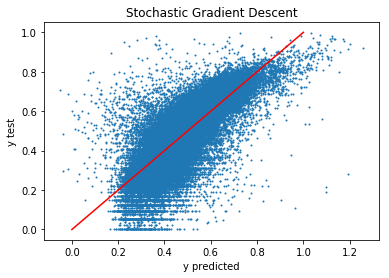

In [17]:
y = b_mark.predict(X_test)

#Create chart to visualize the performance of the benchmark model
fig, ax = plt.subplots(1,1)
plt.scatter(y,y_test,s=1)
ax.plot([0,1],c='r')
ax.set_xlabel('y predicted')
ax.set_ylabel('y test')
ax.set_title('Stochastic Gradient Descent')
fig.savefig('pred_comparison_bm.jpg')

plt.show()